# Минипроект №3.
Представьте, что вы работаете аналитиком в компании, которая занимается арендой велосипедов. Коллега из офиса в Лондоне прислал вам данные за два года: с 4 января 2015 по 3 января 2017. Вам предстоит изучить динамику числа аренд, наличие связи с погодными условиями и выходными, а также объяснить несколько аномалий на графике.
### Задания
- Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.
- Постройте график по числу поездок по дате и времени.
- Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.
- Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.
- Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение.
- Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.
- Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. Найдите причину данной аномалии.
- Изучите аномально низкие значения, найдите день с наименьшим числом аренд. Найдите причину данной аномалии.

### Задание №1.
Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.

Есть ли в данных пропущенные значения?

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
London = pd.read_csv('C:/Users/79196/Projects/data/london.csv')
London.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
London.shape

(17414, 10)

In [4]:
London.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [5]:
London.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [6]:
London['timestamp'] = pd.to_datetime(London['timestamp'] )
London.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

### Задание №2.
Для начала попробуем посмотреть на число поездок по датам и времени. 

Постройте график, где:
- по оси x – дата (timestamp)
- по оси y – число поездок (cnt)

**Выберите верные утверждения:**
- В выходные поездок точно меньше, чем в будние дни
- Очень сложно что-то понять, нужно преобразовать данные, чтобы увидеть тренды
- Случались только аномальные скачки вверх, вниз ничего не падало

In [7]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

<Axes: xlabel='timestamp', ylabel='cnt'>

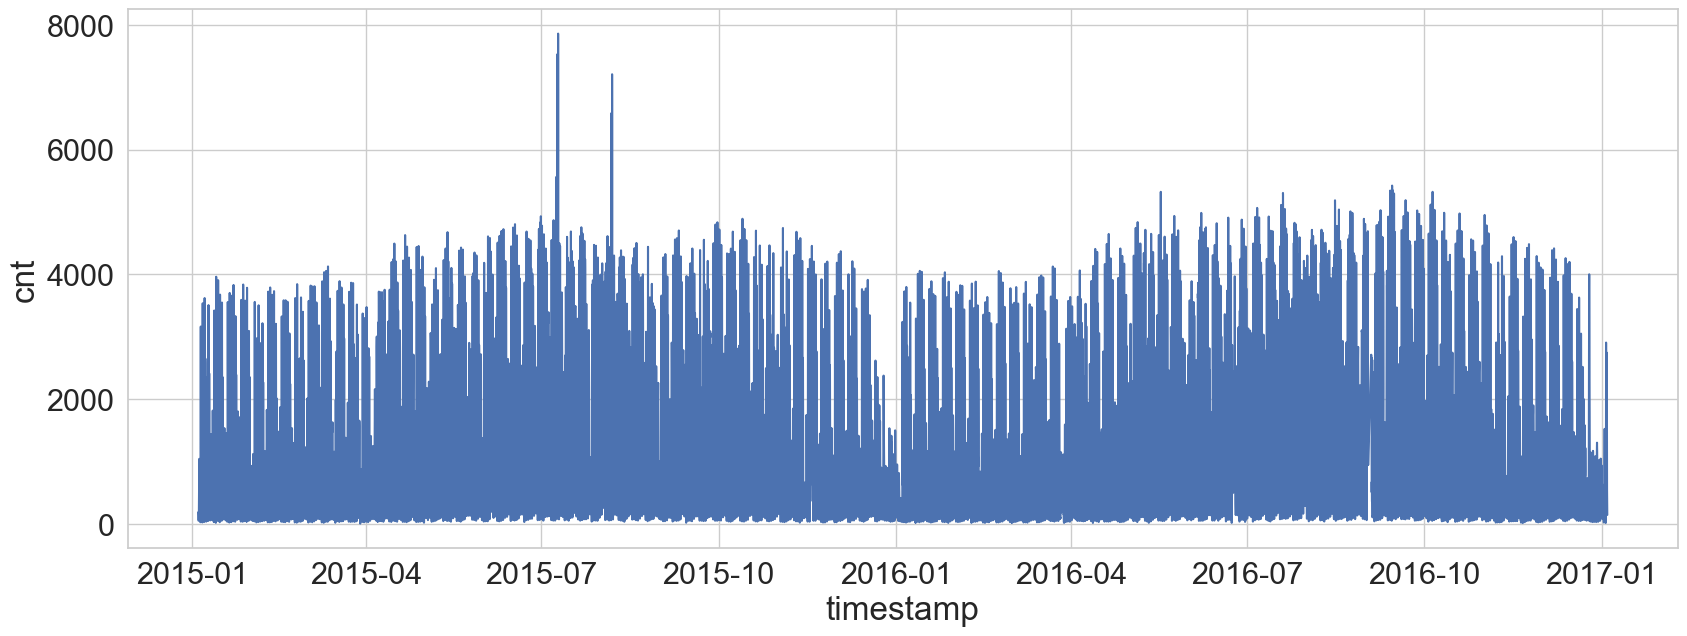

In [8]:
sns.lineplot(data = London, x = 'timestamp', y = 'cnt')

### Задание №3.
Отлично! Предположим, что данные действительно нужно немного преобразовать. В этом нам поможет метод resample. Этот метод позволяет преобразовать данные и применить к какому-либо столбцу другой метод (напр. sum). Так можно рассчитать показатели, например, за весь день или месяц, имея данные с точностью до минут.

Агрегируйте число поездок по дням и визуализируйте результат. Что вы можете сказать о полученном графике? Выберите верные утверждения:
- Максимальное число аренд за день составляет более 70 000
- Максимальное число аренд за день не превышало 8 000
- Максимальное число аренд за день – более 1 000 000
- Число аренд зимой и летом никак не различается
- Встречаются как очень резкие скачки числа аренд, так и падения
- Встречаются только резкие скачки вверх
- Зимой число аренд меньше, чем летом

In [9]:
London_1 = London.sort_values('timestamp').set_index('timestamp')

In [10]:
cnt_by_day = London_1.resample(rule='D').cnt.sum()
cnt_by_day

timestamp
2015-01-04     9234
2015-01-05    20372
2015-01-06    20613
2015-01-07    21064
2015-01-08    15601
              ...  
2016-12-30    11566
2016-12-31    11424
2017-01-01     6421
2017-01-02    11823
2017-01-03    19436
Freq: D, Name: cnt, Length: 731, dtype: int64

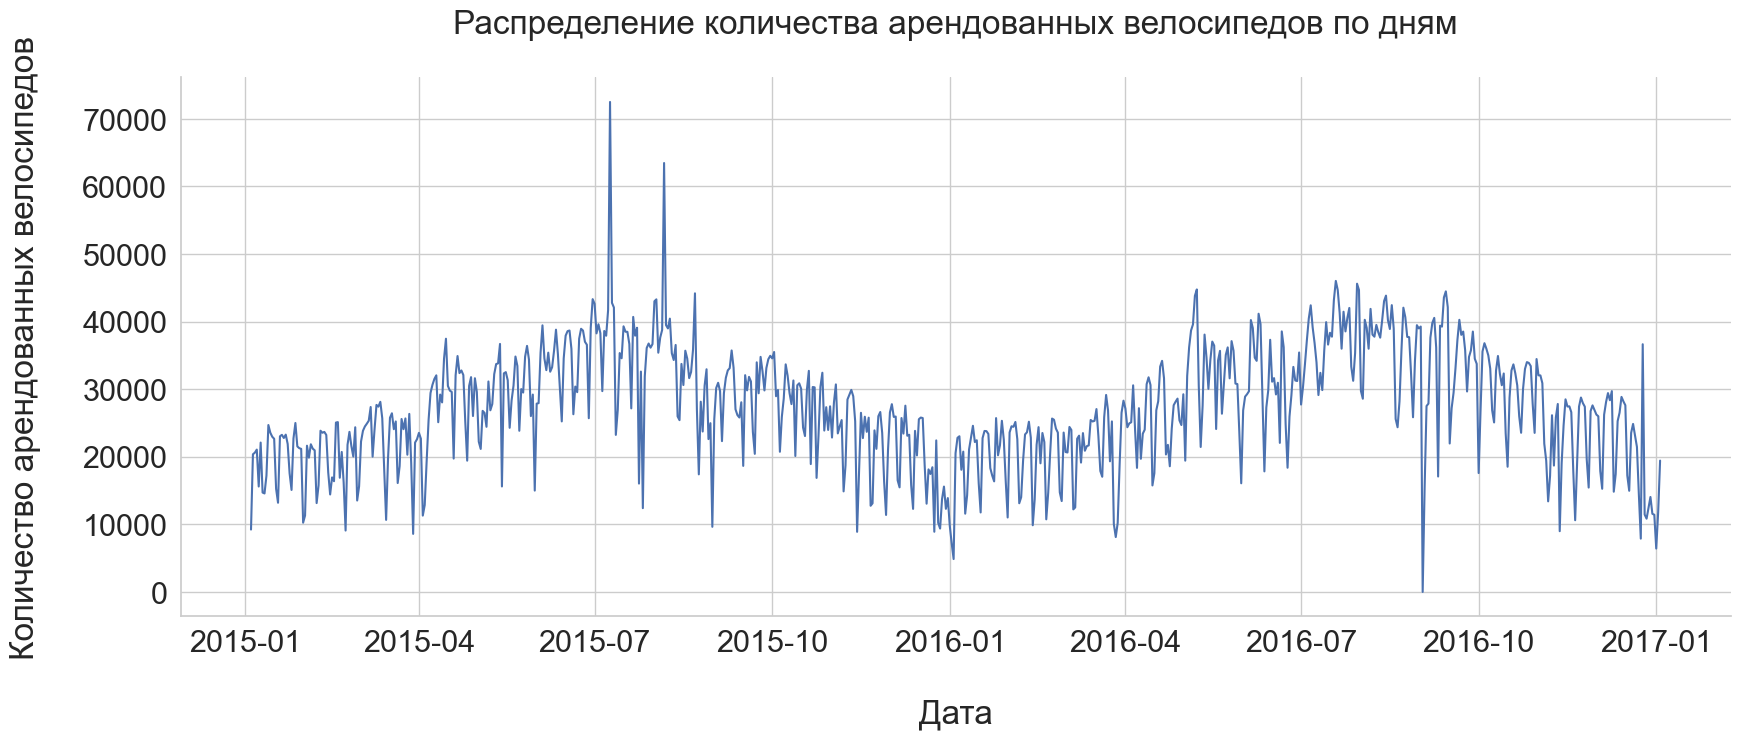

In [11]:
ax2 = sns.lineplot(cnt_by_day)
ax2.set_title('Распределение количества арендованных велосипедов по дням\n')
ax2.set_ylabel('Количество арендованных велосипедов\n')
ax2.set_xlabel('\nДата')
sns.despine()

**Ответ:** 
- Максимальное число аренд за день составляет более 70 000
- Встречаются как очень резкие скачки числа аренд, так и падения
- Зимой число аренд меньше, чем летом

### Задание №4.
На данном шаге возьмите агрегированные данные по дням с предыдущего шага и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за **2015-07-09**, округлив значение до целого.

In [12]:
cnt_by_day.rolling(window=3).mean().reset_index().query('timestamp == "2015-07-09"')

,timestamp,cnt
186,2015-07-09,50705.0


**Ответ:** скользящее среднее аренд велосипедов за 2015-07-09 = ***50705***

### Задание №5.
Теперь посчитайте разницу между наблюдаемыми и подсчитанными значениями. Далее – примените функцию для подсчета стандартного отклонения. 
В качестве ответа введите полученное стандартное отклонение, округленное до 2 знаков после точки.

In [13]:
rolling_cnt_by_day = cnt_by_day.rolling(window=3).mean()
rolling_cnt_by_day

timestamp
2015-01-04             NaN
2015-01-05             NaN
2015-01-06    16739.666667
2015-01-07    20683.000000
2015-01-08    19092.666667
                  ...     
2016-12-30    12682.000000
2016-12-31    12347.333333
2017-01-01     9803.666667
2017-01-02     9889.333333
2017-01-03    12560.000000
Freq: D, Name: cnt, Length: 731, dtype: float64

In [14]:
c = cnt_by_day - rolling_cnt_by_day
c

timestamp
2015-01-04            NaN
2015-01-05            NaN
2015-01-06    3873.333333
2015-01-07     381.000000
2015-01-08   -3491.666667
                 ...     
2016-12-30   -1116.000000
2016-12-31    -923.333333
2017-01-01   -3382.666667
2017-01-02    1933.666667
2017-01-03    6876.000000
Freq: D, Name: cnt, Length: 731, dtype: float64

In [15]:
std = np.std(c)
round(std, 2)

4558.59

**Ответ:** std = 4558.59

### Задание №6.
Теперь определим границы интервалов. Для этого нужно взять данные, полученные при расчете скользящего среднего, и создать следующие объекты:

- upper_bound – верхняя граница; к средним прибавляем 2.576∗std
- lower_bound – нижняя граница; вычитаем 2.576∗std
Полученные значения запишите в новые столбцы датафрейма с агрегированными данными.

Чему равно значение верхней границы для последнего наблюдения? Ответ укажите с точностью до 2 знаков после точки.

In [16]:
dov_interval1 = rolling_cnt_by_day + 2.576*std
d1 = dov_interval1.reset_index()
d1

,timestamp,cnt
0,2015-01-04,NaN
1,2015-01-05,NaN
2,2015-01-06,28482.585854
3,2015-01-07,32425.919188
4,2015-01-08,30835.585854
...,...,...
726,2016-12-30,24424.919188
727,2016-12-31,24090.252521
728,2017-01-01,21546.585854
729,2017-01-02,21632.252521


In [17]:
dov_interval2 = rolling_cnt_by_day - 2.576*std
d2 = dov_interval2.reset_index()
d2

,timestamp,cnt
0,2015-01-04,NaN
1,2015-01-05,NaN
2,2015-01-06,4996.747479
3,2015-01-07,8940.080812
4,2015-01-08,7349.747479
...,...,...
726,2016-12-30,939.080812
727,2016-12-31,604.414146
728,2017-01-01,-1939.252521
729,2017-01-02,-1853.585854


**Ответ:** для последнего наблюдения значение верхней границы равно = **24302.92**

### Задание №7.
Сначала выведите наблюдения, для которых наблюдаемые значения оказались больше верхней границы 99% доверительного интервала.

В какой день значение числа аренд оказалось наибольшим? Укажите дату.

In [18]:
merge_rolling_counts = cnt_by_day.reset_index().merge(d1, on = 'timestamp')
merge_rolling_counts

,timestamp,cnt_x,cnt_y
0,2015-01-04,9234,NaN
1,2015-01-05,20372,NaN
2,2015-01-06,20613,28482.585854
3,2015-01-07,21064,32425.919188
4,2015-01-08,15601,30835.585854
...,...,...,...
726,2016-12-30,11566,24424.919188
727,2016-12-31,11424,24090.252521
728,2017-01-01,6421,21546.585854
729,2017-01-02,11823,21632.252521


In [19]:
merge_rolling_counts.query('cnt_x > cnt_y').sort_values('cnt_x', ascending=False)

,timestamp,cnt_x,cnt_y
186,2015-07-09,72504,62447.919188
214,2015-08-06,63468,58370.252521
721,2016-12-25,36653,31393.585854
609,2016-09-04,27512,26001.919188


**Ответ:** значение числа аренд оказалось наибольшим в 2015-07-09